<a href="https://colab.research.google.com/github/ghost9933/ML/blob/main/Fake_News_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

#Downloading the DataSet

In [49]:
!pwd
!ls -l -r


/content
total 14320
-rw-r--r-- 1 root root 13172025 Sep 26 00:50 tree.png
-rw-r--r-- 1 root root  1482480 Sep 26 00:48 tree.dot
drwxr-xr-x 1 root root     4096 Sep 24 13:23 sample_data
drwxr-xr-x 6 root root     4096 Sep 25 23:27 LIAR2


In [50]:
!pip install datasets

In [51]:
!git clone https://github.com/chengxuphd/LIAR2

fatal: destination path 'LIAR2' already exists and is not an empty directory.


#Imports Go Here

In [52]:
import pandas as pd

#Loading the Test Train and Validate Data from the Dataset

In [53]:
train_df = pd.read_csv('LIAR2/liar2/train.csv', encoding='utf-8', delimiter=',')
val_df = pd.read_csv('LIAR2/liar2/valid.csv', encoding='utf-8', delimiter=',')
test_df = pd.read_csv('LIAR2/liar2/test.csv', encoding='utf-8', delimiter=',')

First 5 Rows:
      id  label                                          statement  \
0  13847      5  90 percent of Americans "support universal bac...   
1  13411      1  Last year was one of the deadliest years ever ...   
2  10882      0  Bernie Sanders's plan is "to raise your taxes ...   
3  20697      4  Voter ID is supported by an overwhelming major...   
4   6095      2  Says Barack Obama "robbed Medicare (of) $716 b...   

               date                                            subject  \
0   October 2, 2017  government regulation;polls and public opinion...   
1      May 19, 2017  after the fact;congress;criminal justice;histo...   
2  October 28, 2015                                              taxes   
3  December 8, 2021                                      voter id laws   
4   August 12, 2012         federal budget;history;medicare;retirement   

          speaker                                speaker_description  \
0     chris abele  Chris Abele is Milwaukee Coun

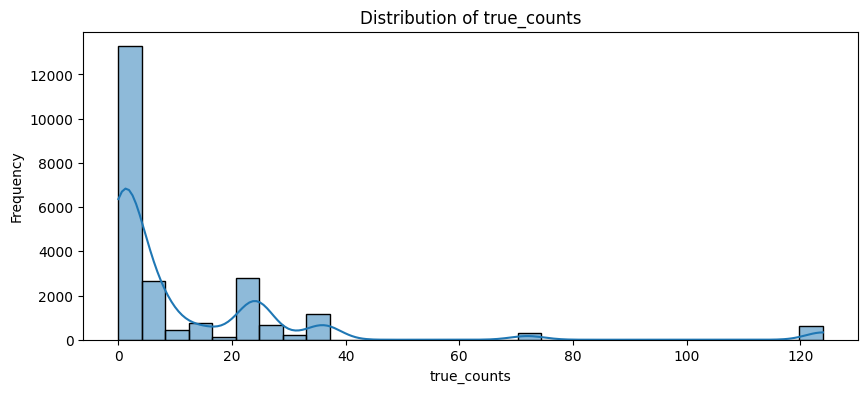

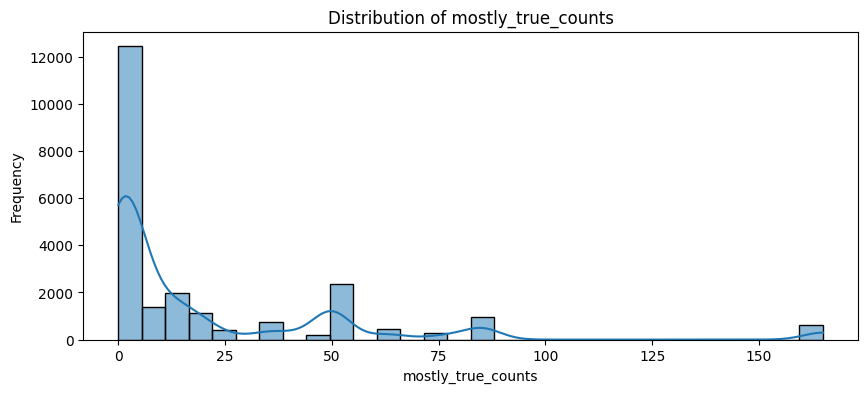

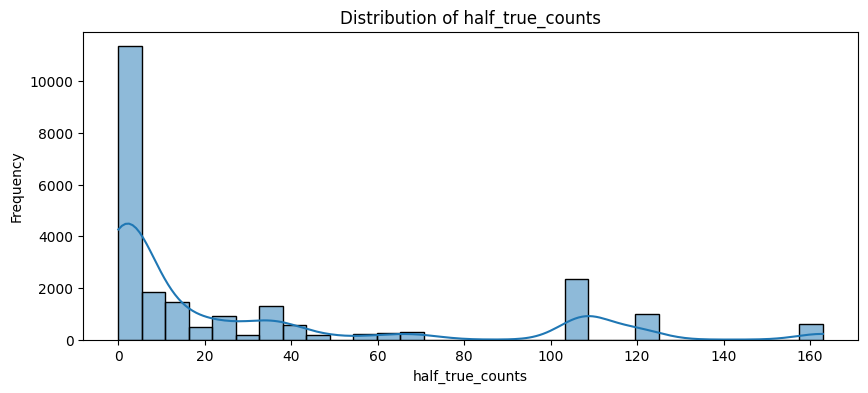

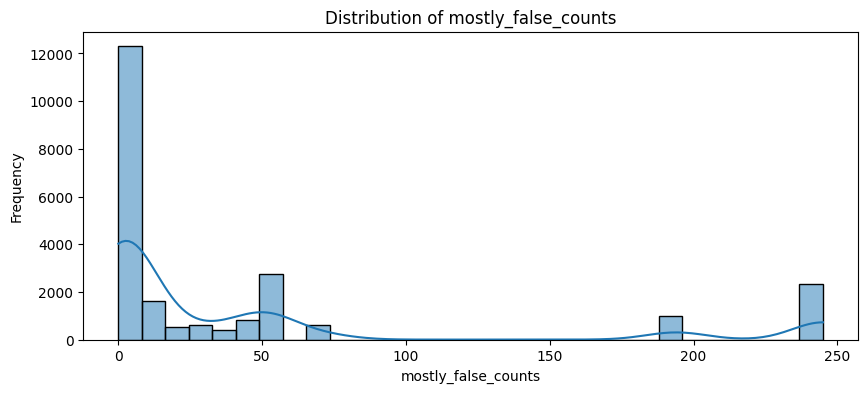

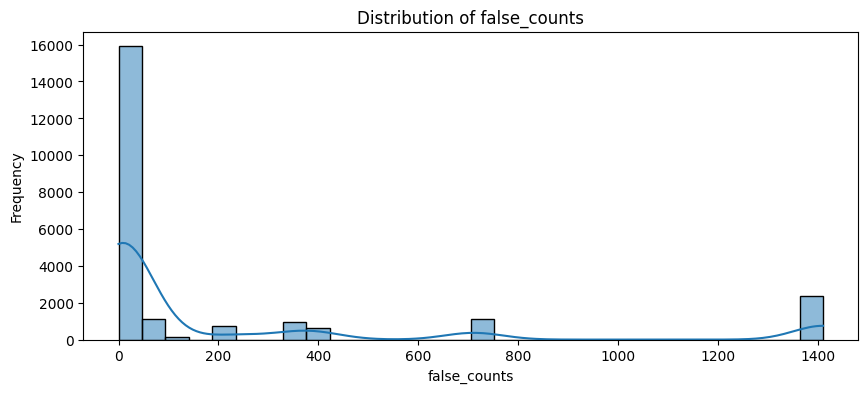

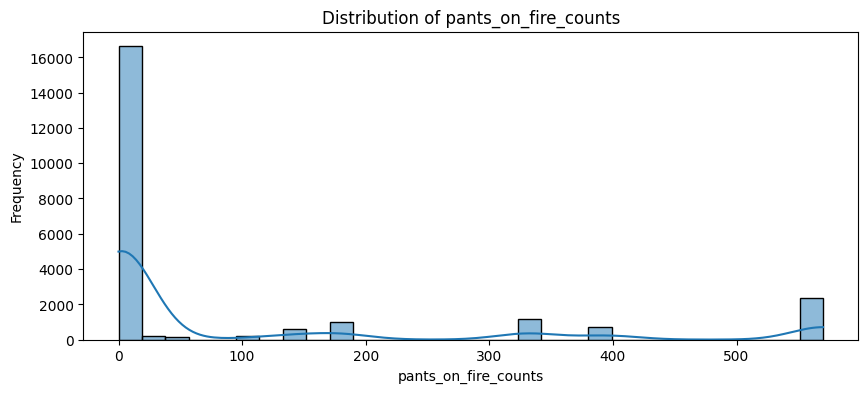

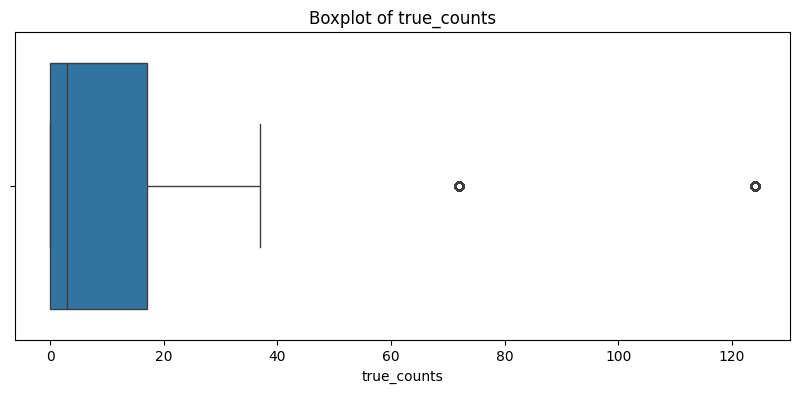

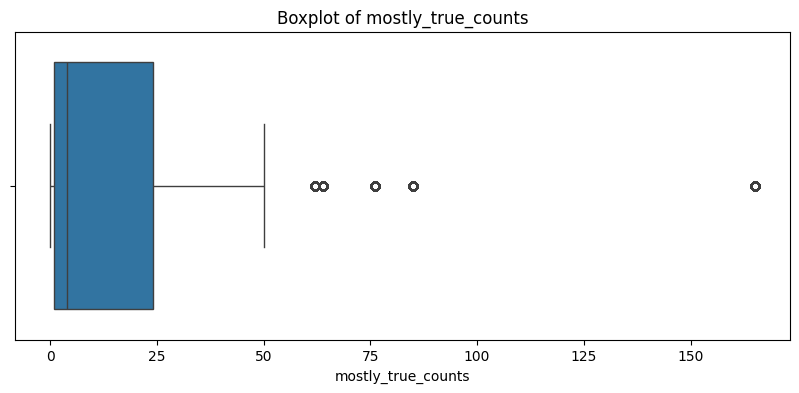

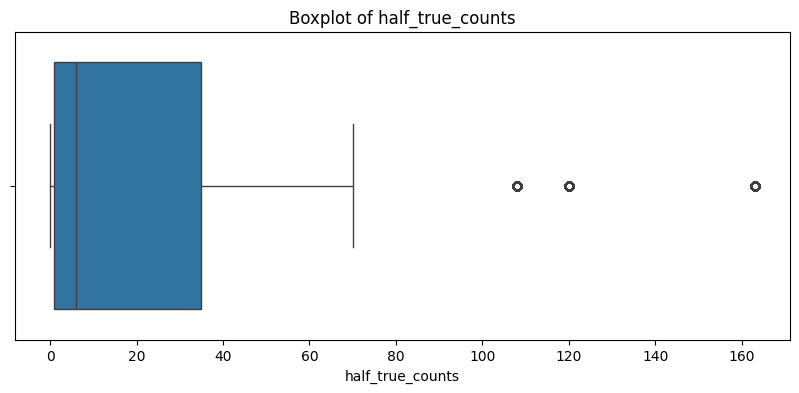

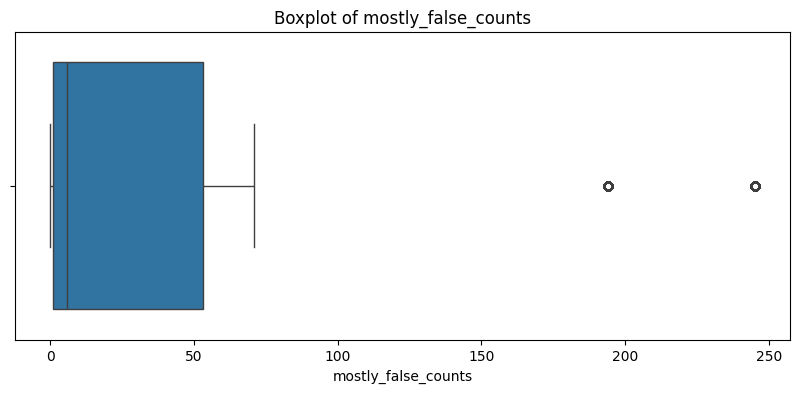

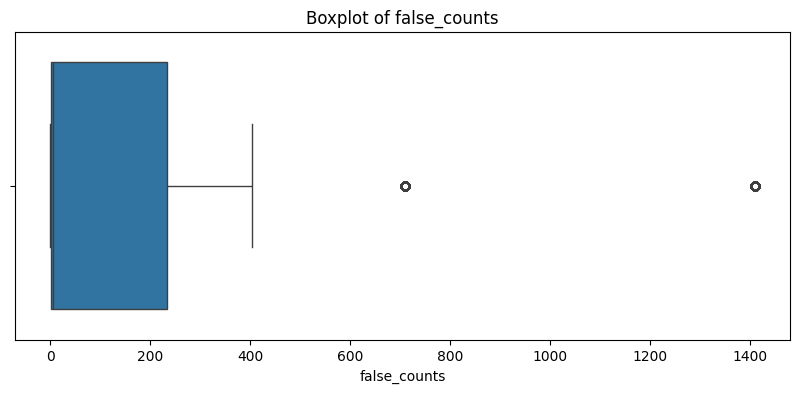

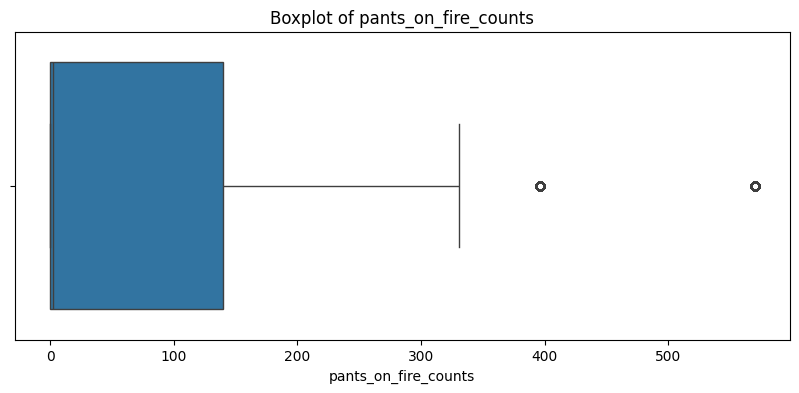

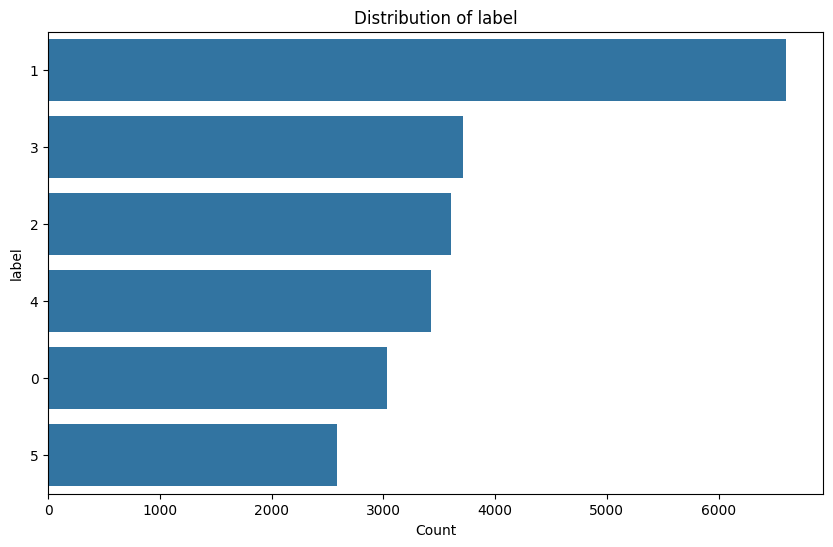

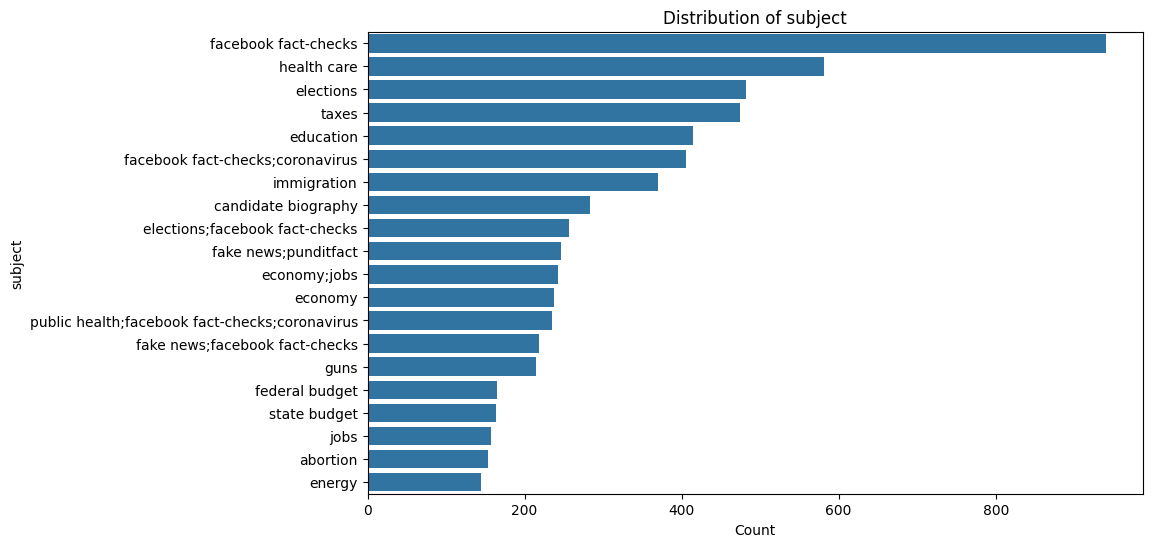

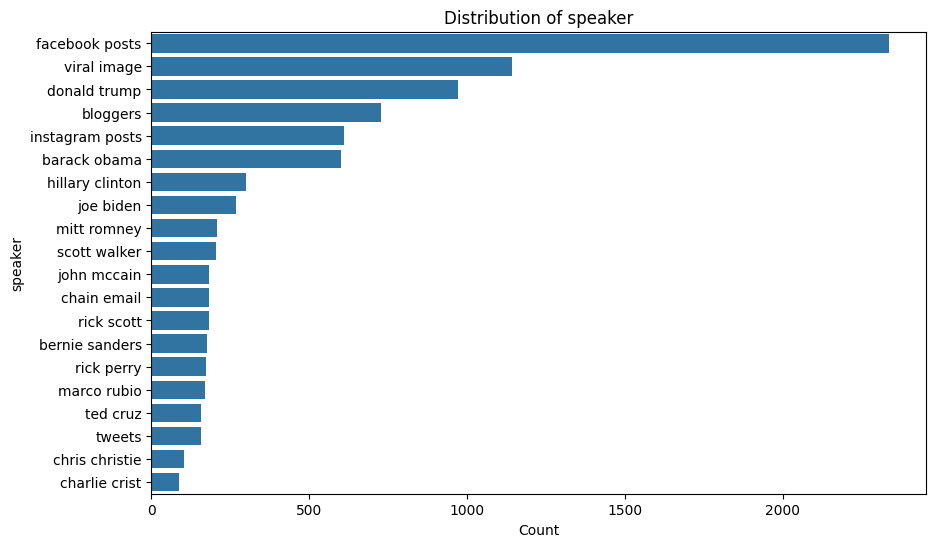

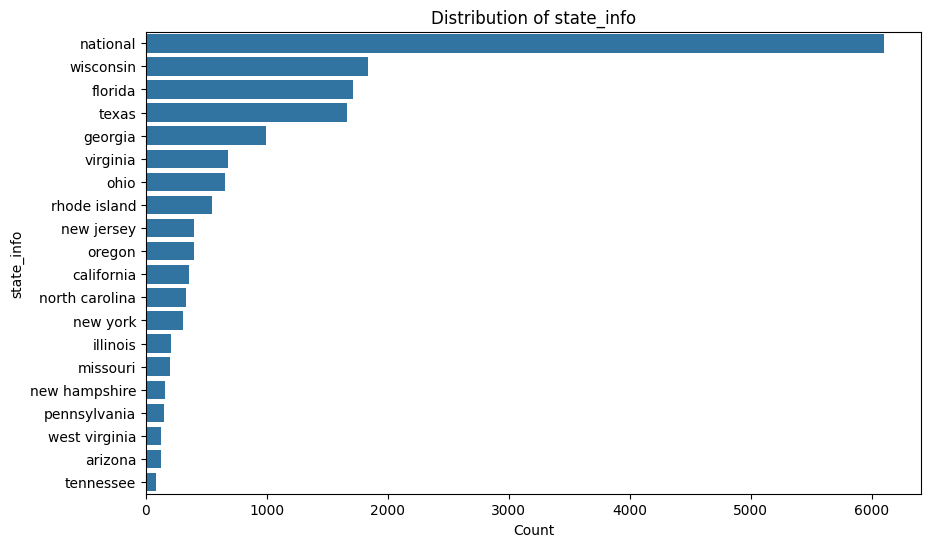

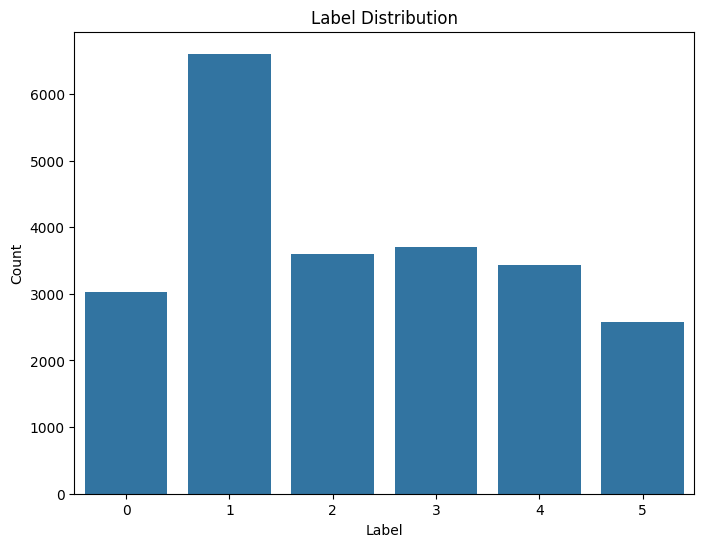

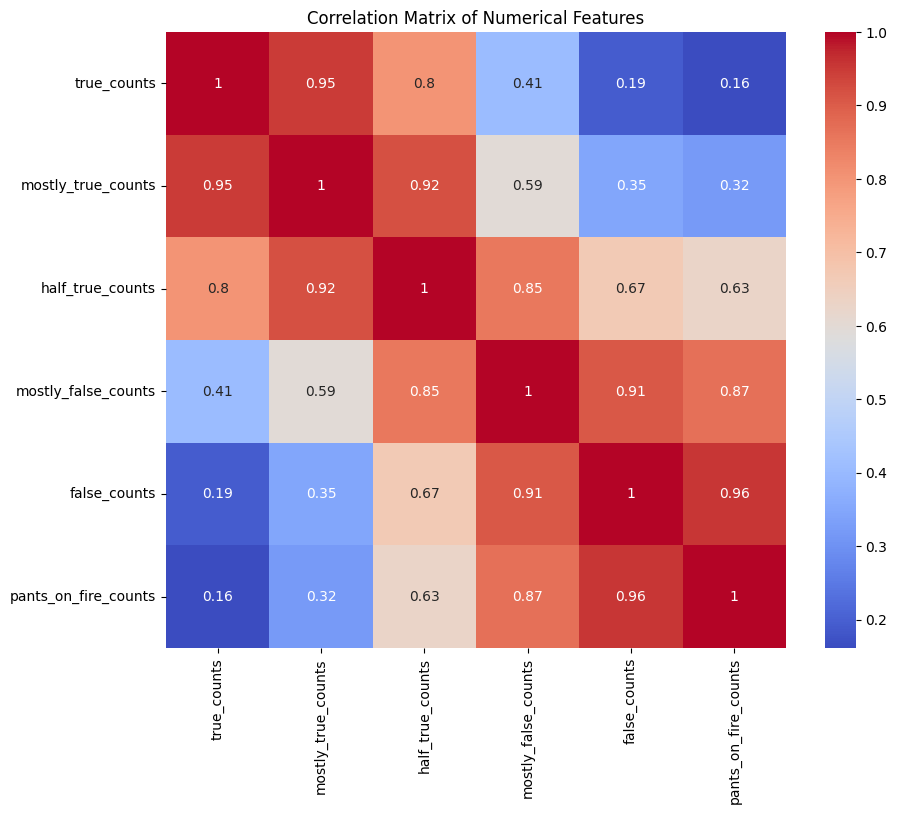

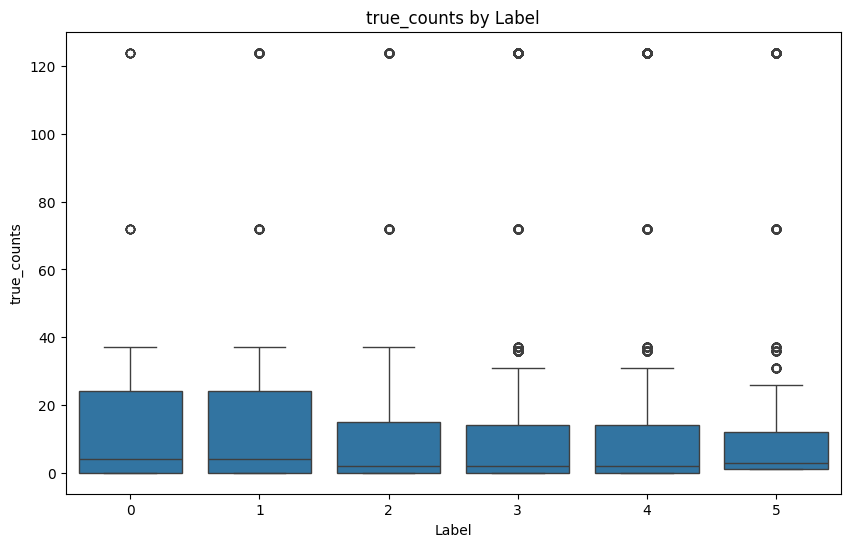

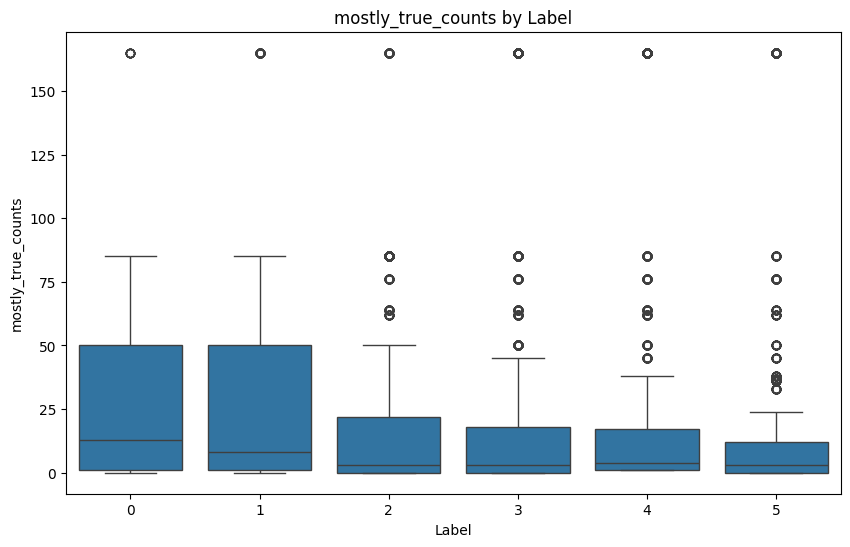

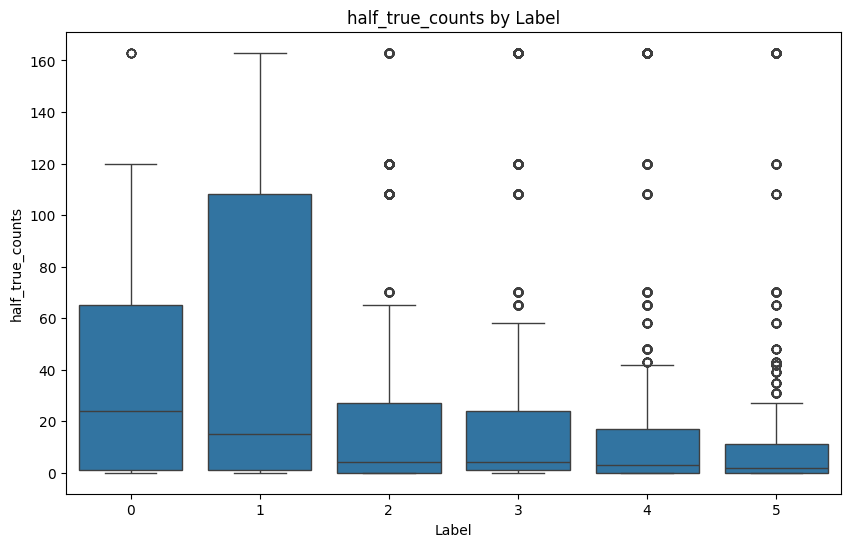

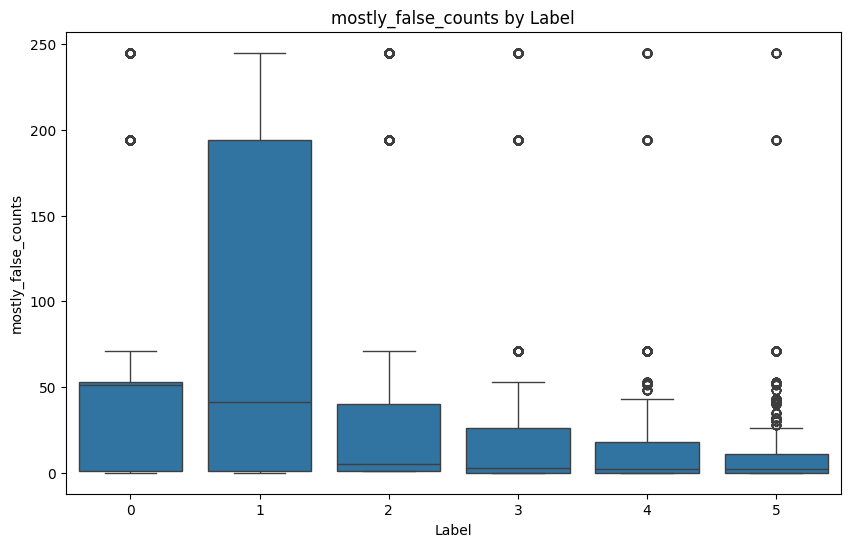

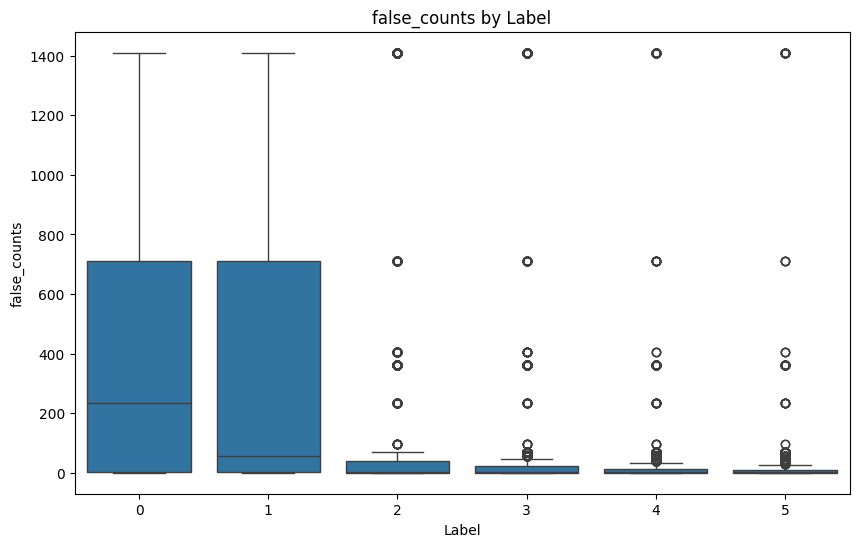

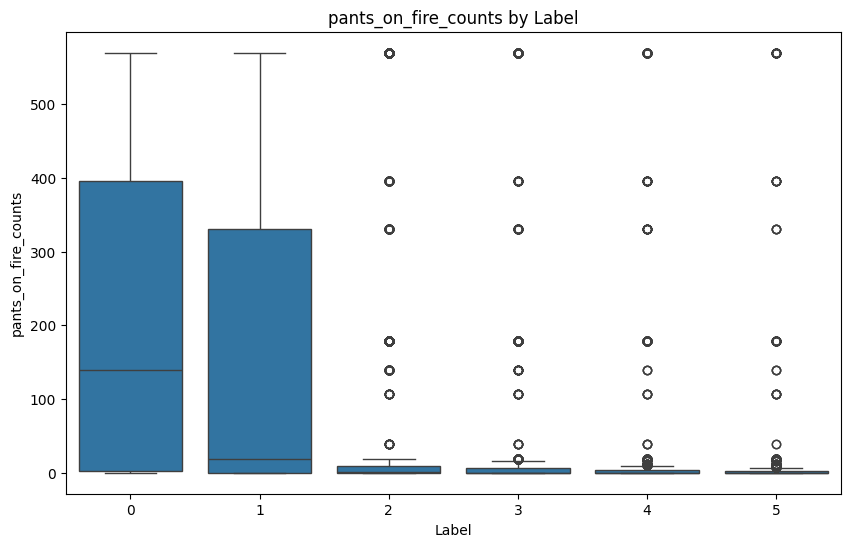

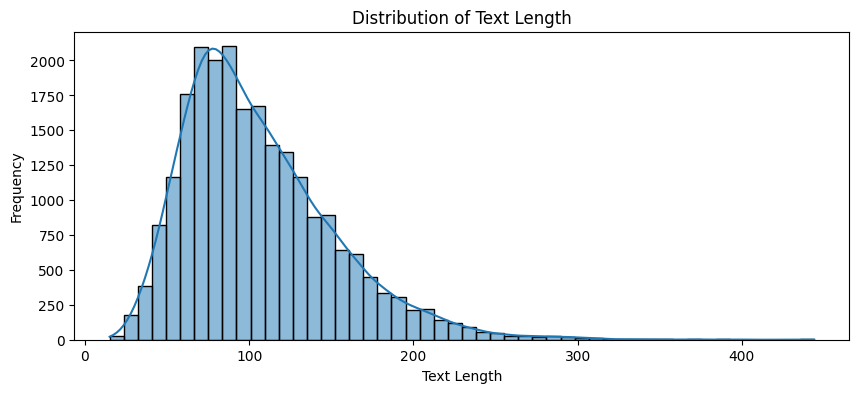

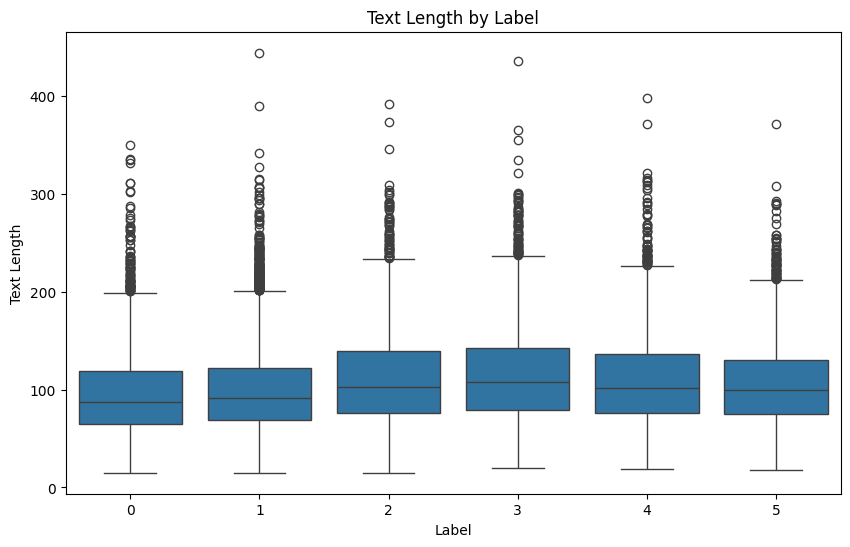

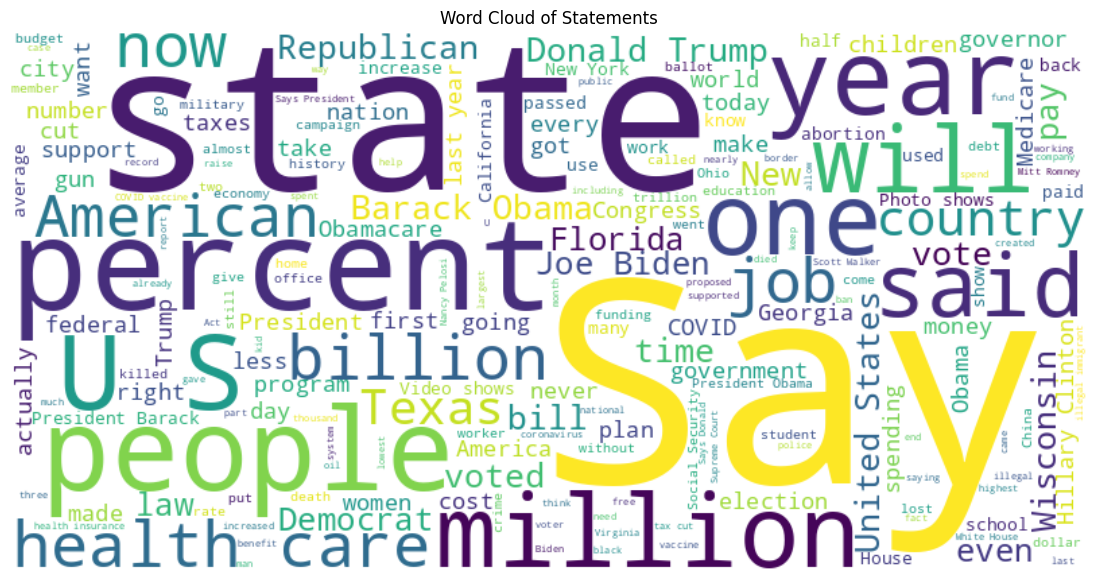

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Combine datasets for EDA (optional)
data_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Display basic information
print("First 5 Rows:")
print(data_df.head())

print("\nData Types:")
print(data_df.dtypes)

print("\nSummary Statistics:")
print(data_df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(data_df.isnull().sum())

# Handling missing values (if any)
# You can choose to drop or fill missing values
# data_df = data_df.dropna()
# or
# data_df = data_df.fillna(method='ffill')

# List of numerical and categorical features
numerical_features = ['true_counts', 'mostly_true_counts', 'half_true_counts',
                      'mostly_false_counts', 'false_counts', 'pants_on_fire_counts']
categorical_features = ['label', 'subject', 'speaker', 'state_info']

# Exploratory Data Analysis

## Distribution of Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Boxplots for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

## Distribution of Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    order = data_df[feature].value_counts().iloc[:20].index  # Top 20 categories
    sns.countplot(y=feature, data=data_df, order=order)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

## Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data_df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Correlation Matrix
corr_matrix = data_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between Numerical Features and Label
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=data_df)
    plt.title(f'{feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

# Text Length Analysis (if applicable)
if 'statement' in data_df.columns:
    data_df['text_length'] = data_df['statement'].apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(data_df['text_length'], bins=50, kde=True)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    # Text Length by Label
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='text_length', data=data_df)
    plt.title('Text Length by Label')
    plt.xlabel('Label')
    plt.ylabel('Text Length')
    plt.show()

# Word Cloud of Statements (optional)
from wordcloud import WordCloud, STOPWORDS

if 'statement' in data_df.columns:
    text = " ".join(statement for statement in data_df['statement'].dropna())
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Statements')
    plt.show()


Data Issues report


----- Missing Values Report -----

Columns with missing values:
subject                 207
speaker_description      10
state_info             5641
context                 154
dtype: int64


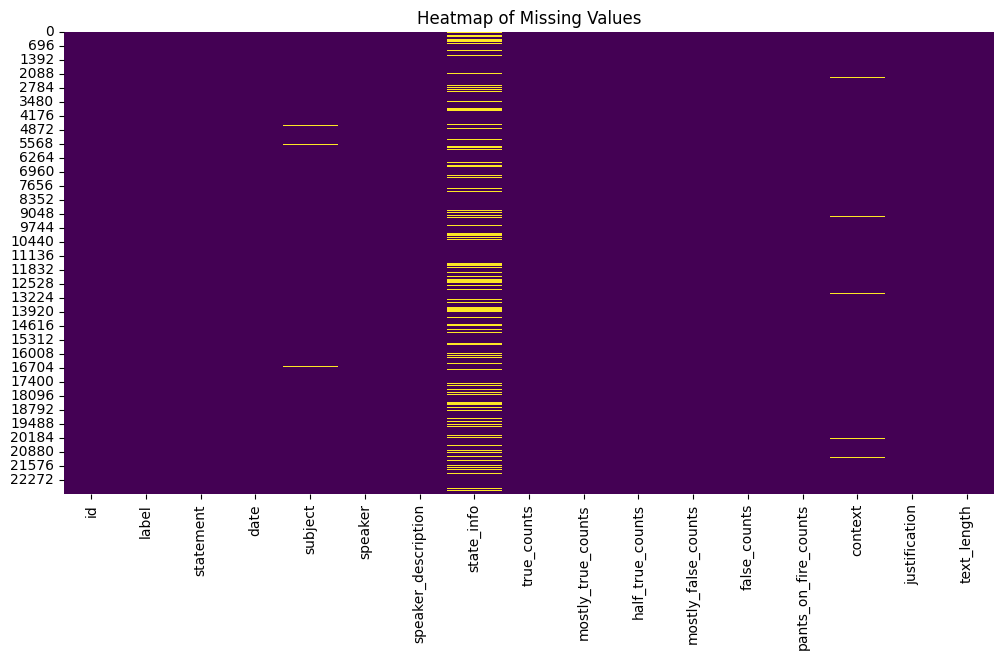


----- Noise Identification Report -----

Column 'statement' has a high number of unique categories (22928), which may indicate noise.
Column 'date' has a high number of unique categories (5160), which may indicate noise.
Column 'subject' has a high number of unique categories (7127), which may indicate noise.
Column 'speaker' has a high number of unique categories (4661), which may indicate noise.
Column 'speaker_description' has a high number of unique categories (4641), which may indicate noise.
Column 'state_info' has a high number of unique categories (26), which may indicate noise.
Column 'context' has a high number of unique categories (5523), which may indicate noise.
Column 'justification' has a high number of unique categories (22936), which may indicate noise.
Further noise detection may require domain-specific rules.

----- Duplicates Report -----

No duplicate rows found in the dataset.

----- Outliers Report -----

Outliers detected in 'true_counts':
14       124
19      

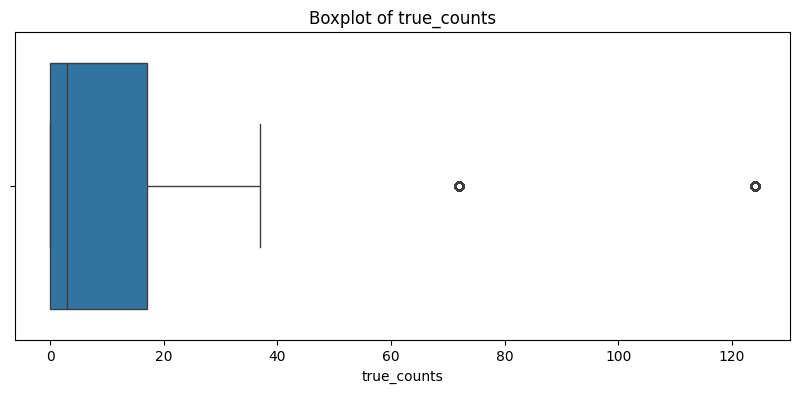

Outliers detected in 'mostly_true_counts':
7         85
14       165
19       165
22       165
28        85
        ... 
22934     85
22936     85
22948    165
22950     85
22953    165
Name: mostly_true_counts, Length: 2317, dtype: int64


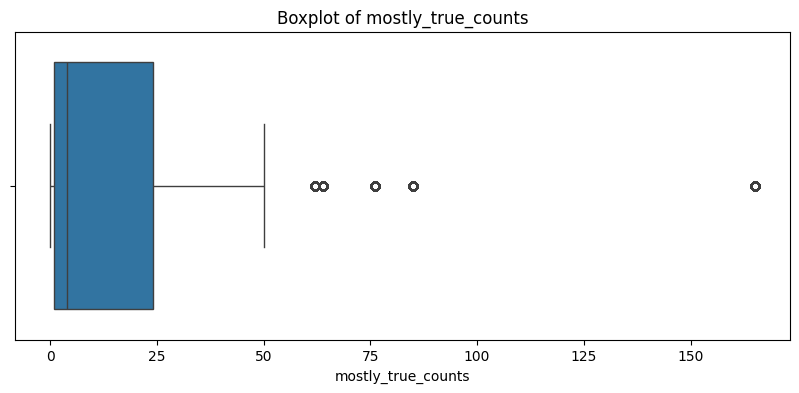

Outliers detected in 'half_true_counts':
5        108
7        120
14       163
19       163
22       163
        ... 
22953    163
22955    108
22958    108
22959    108
22961    108
Name: half_true_counts, Length: 3914, dtype: int64


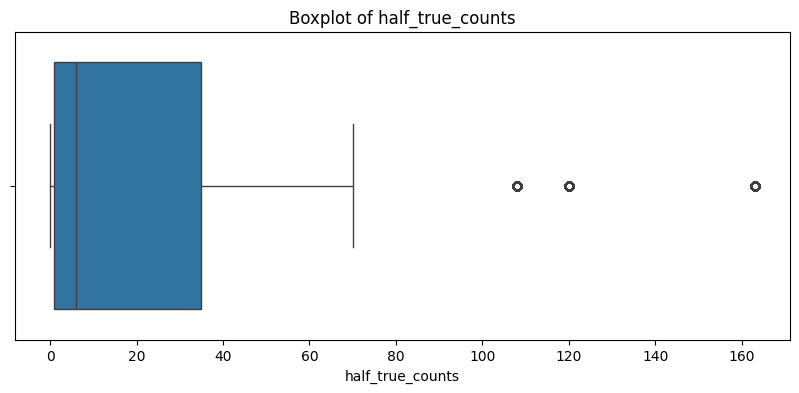

Outliers detected in 'mostly_false_counts':
5        245
7        194
24       245
28       194
29       194
        ... 
22950    194
22955    245
22958    245
22959    245
22961    245
Name: mostly_false_counts, Length: 3312, dtype: int64


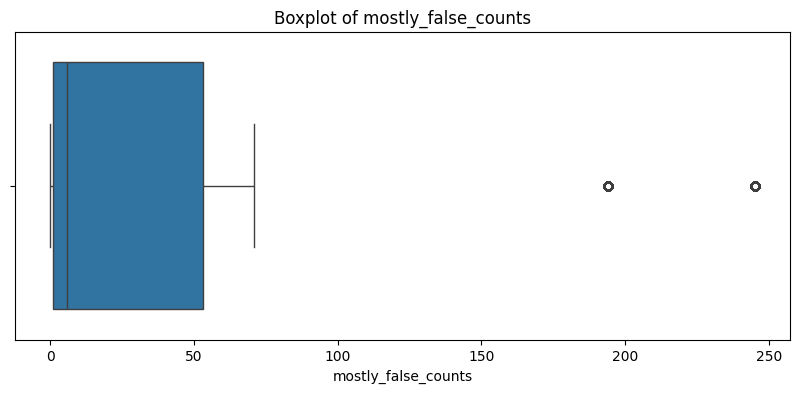

Outliers detected in 'false_counts':
5        1410
20        711
24       1410
36       1410
38       1410
         ... 
22955    1410
22956     711
22958    1410
22959    1410
22961    1410
Name: false_counts, Length: 3482, dtype: int64


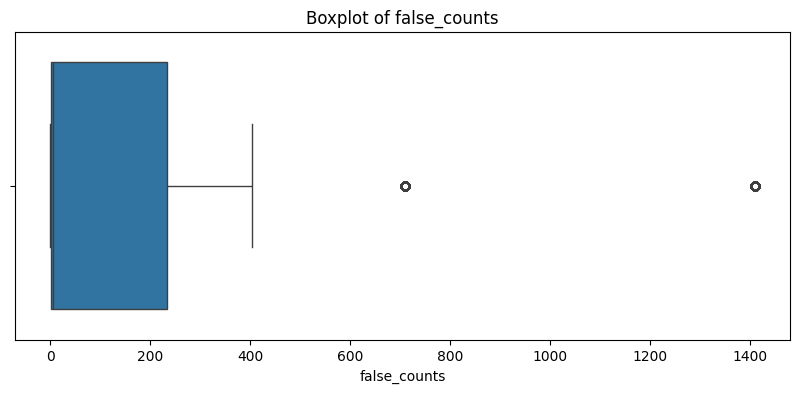

Outliers detected in 'pants_on_fire_counts':
5        570
24       570
26       396
36       570
38       570
        ... 
22931    570
22955    570
22958    570
22959    570
22961    570
Name: pants_on_fire_counts, Length: 3067, dtype: int64


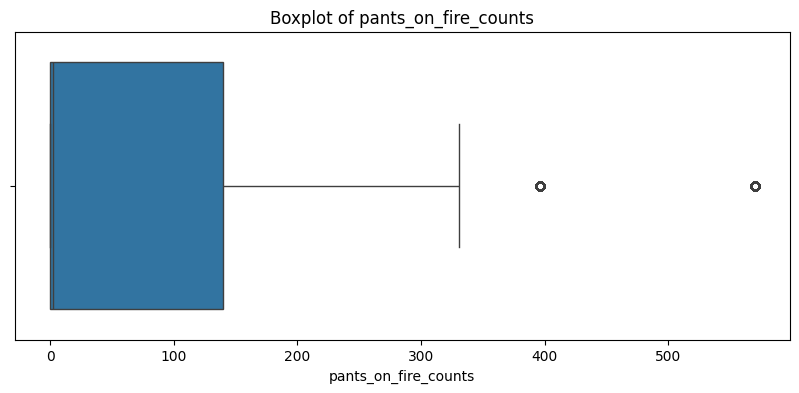

Outliers detected in 'text_length':
29       219
46       269
207      301
263      219
338      233
        ... 
22699    234
22722    224
22775    334
22791    230
22857    219
Name: text_length, Length: 519, dtype: int64


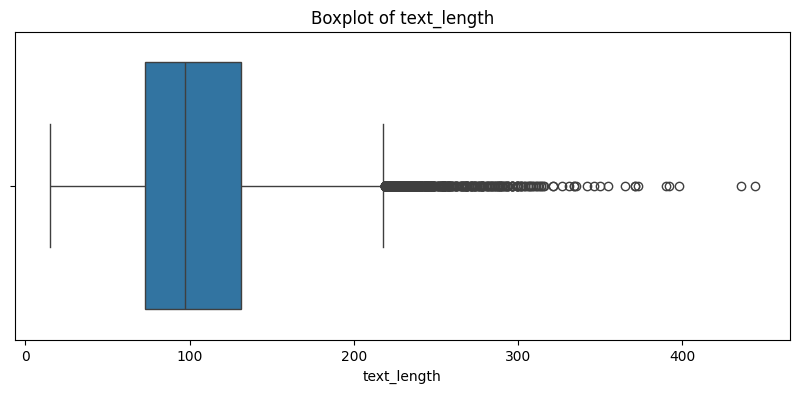


----- Data Type Mismatches Report -----

Column 'id' has data type 'int64' but expected '<class 'numpy.number'>'.
Column 'label' has data type 'int64' but expected '<class 'numpy.number'>'.
Column 'statement' data type matches expected '<class 'object'>'.
Column 'date' data type matches expected 'datetime64[ns]'.
Column 'subject' data type matches expected '<class 'object'>'.
Column 'speaker' data type matches expected '<class 'object'>'.
Column 'speaker_description' data type matches expected '<class 'object'>'.
Column 'state_info' data type matches expected '<class 'object'>'.
Column 'context' data type matches expected '<class 'object'>'.
Column 'justification' data type matches expected '<class 'object'>'.


In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load your dataset
# Assuming your data is in a CSV file, replace 'your_dataset.csv' with your file path
# For this script, we'll assume the DataFrame is named 'data_df'

# Example: data_df = pd.read_csv('your_dataset.csv')

# If you have already loaded your data as 'data_df', skip the above line

# -------------------------
# 1. Identify Missing Values
# -------------------------

def report_missing_values(df):
    print("\n----- Missing Values Report -----\n")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print("Columns with missing values:")
        print(missing_values)
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title('Heatmap of Missing Values')
        plt.show()
    else:
        print("No missing values found in the dataset.")

# -------------------------
# 2. Identify Noise in Data
# -------------------------

def report_noise(df):
    print("\n----- Noise Identification Report -----\n")
    # Noise can be subjective; here we'll consider inconsistent categorical data and invalid entries

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Check for inconsistent data in categorical columns
    for col in categorical_cols:
        unique_values = df[col].unique()
        if len(unique_values) > 20:
            print(f"Column '{col}' has a high number of unique categories ({len(unique_values)}), which may indicate noise.")
        else:
            print(f"Unique values in '{col}': {unique_values}")

    # Identify invalid numerical entries (e.g., negative ages, impossible values)
    # Example for age column:
    # if 'age' in df.columns:
    #     invalid_ages = df[df['age'] < 0]
    #     if not invalid_ages.empty:
    #         print(f"Invalid age entries found:\n{invalid_ages['age']}")

    print("Further noise detection may require domain-specific rules.")

# -------------------------
# 3. Identify Duplicates
# -------------------------

def report_duplicates(df):
    print("\n----- Duplicates Report -----\n")
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
        print("Duplicate rows:")
        print(duplicate_rows.head())
    else:
        print("No duplicate rows found in the dataset.")

# -------------------------
# 4. Identify Outliers
# -------------------------

def report_outliers(df):
    print("\n----- Outliers Report -----\n")
    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns

    # Using Interquartile Range (IQR) method to detect outliers
    outlier_indices = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        if not outlier_list_col.empty:
            outlier_indices[col] = outlier_list_col
            print(f"Outliers detected in '{col}':")
            print(df.loc[outlier_list_col, col])
            # Visualize outliers
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col}')
            plt.show()
    if not outlier_indices:
        print("No significant outliers detected in numerical columns.")

# -------------------------
# 5. Identify Data Type Mismatches
# -------------------------

def report_datatype_mismatches(df):
    print("\n----- Data Type Mismatches Report -----\n")
    # Expected data types (you may need to adjust this according to your dataset)
    expected_dtypes = {
        'id': np.number,
        'label': np.number,
        'statement': object,
        'date': 'datetime64[ns]',
        'subject': object,
        'speaker': object,
        'speaker_description': object,
        'state_info': object,
        'context': object,
        'justification': object
    }

    # Convert 'date' column to datetime if present
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

    for col, expected_dtype in expected_dtypes.items():
        if col in df.columns:
            actual_dtype = df[col].dtype
            if actual_dtype != expected_dtype:
                print(f"Column '{col}' has data type '{actual_dtype}' but expected '{expected_dtype}'.")
            else:
                print(f"Column '{col}' data type matches expected '{expected_dtype}'.")
        else:
            print(f"Column '{col}' not found in the dataset.")

# -------------------------
# Run All Reports
# -------------------------

def run_data_cleaning_reports(df):
    report_missing_values(df)
    report_noise(df)
    report_duplicates(df)
    report_outliers(df)
    report_datatype_mismatches(df)

# -------------------------
# Execute the script
# -------------------------

# Assuming your DataFrame is named 'data_df'
# Replace 'data_df' with the name of your DataFrame variable
run_data_cleaning_reports(data_df)


#handelling missing values

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Handle Missing Values
# -------------------------

def clean_missing_values(df):
    # Fill missing values
    df['subject'] = df['subject'].fillna('World')
    df['context'] = df['context'].fillna('Unknown')
    df['speaker_description'] = df['speaker_description'].fillna('No Description')
    df['state_info'] = df['state_info'].fillna('Unknown')

    # Convert 'state_info' to lowercase to ensure consistency
    df['state_info'] = df['state_info'].str.lower()

    # Replace 'national' with 'USA' in 'state_info', handling any case variations
    df['state_info'] = df['state_info'].str.replace('national', 'USA', case=False)

    # Return the modified DataFrame
    return df

# -------------------------
# 2. Remove Duplicate Rows
# -------------------------

def remove_duplicates(df):
    before_shape = df.shape
    df = df.drop_duplicates()
    after_shape = df.shape
    print(f"Removed {before_shape[0] - after_shape[0]} duplicate rows.")

    # Return the modified DataFrame
    return df

# -------------------------
# 3. Clean Dataset Function
# -------------------------

def clean_dataset(df):
    df = clean_missing_values(df)
    df = remove_duplicates(df)
    return df

# -------------------------
# Execute the script
# -------------------------

# Assuming your DataFrame is named 'data_df'
# Replace 'data_df' with the name of your DataFrame variable
data_df = clean_dataset(data_df)


Removed 0 duplicate rows.


Accuracy Score: 0.51165831335803

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.26      0.37       605
           1       0.46      0.80      0.58      1338
           2       0.73      0.39      0.51       696
           3       0.56      0.47      0.51       766
           4       0.52      0.48      0.50       664
           5       0.46      0.33      0.38       520

    accuracy                           0.51      4589
   macro avg       0.56      0.45      0.47      4589
weighted avg       0.55      0.51      0.50      4589


Top 20 Most Important Features:
                 feature  importance
0                   year    0.012057
1617             element    0.010524
3301           partially    0.010016
963        clarification    0.007655
2350          impression    0.007594
3742                rate    0.007337
3082               needs    0.007301
1149            contains    0.007130
238             accurate    0.0069

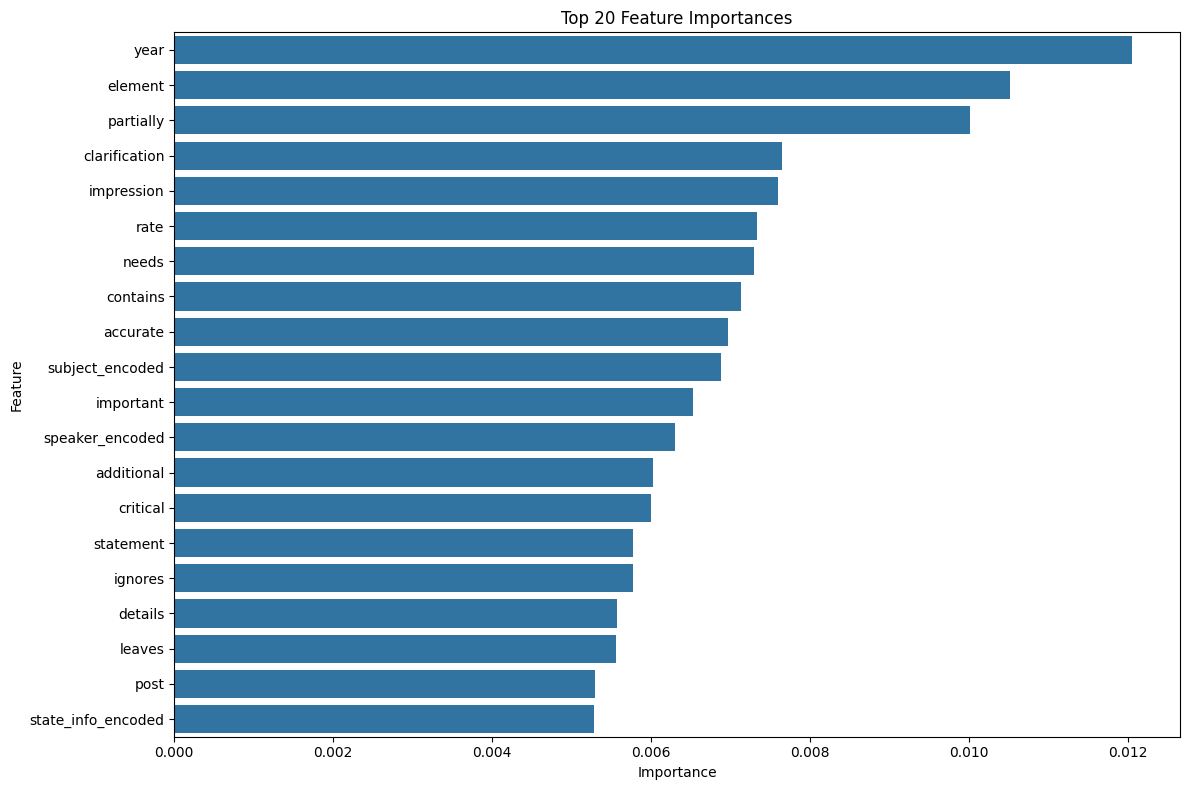

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# For handling text data
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying images
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Load and Preprocess Data
# -------------------------

# Load your datasets
train_df = pd.read_csv('LIAR2/liar2/train.csv', encoding='utf-8', delimiter=',')
val_df = pd.read_csv('LIAR2/liar2/valid.csv', encoding='utf-8', delimiter=',')
test_df = pd.read_csv('LIAR2/liar2/test.csv', encoding='utf-8', delimiter=',')

# Combine datasets
data_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Select specified columns
columns_to_use = [
    'label',
    'statement',
    'date',
    'subject',
    'speaker',
    'speaker_description',
    'state_info',
    'context',
    'justification'
]
data_df = data_df[columns_to_use]

# -------------------------
# 2. Handle Missing Values and Data Cleaning
# -------------------------

# Fill missing values
data_df['subject'] = data_df['subject'].fillna('World')
data_df['context'] = data_df['context'].fillna('Unknown')
data_df['speaker_description'] = data_df['speaker_description'].fillna('No Description')
data_df['state_info'] = data_df['state_info'].fillna('Unknown')

# Convert 'state_info' to lowercase and replace 'national' with 'USA'
data_df['state_info'] = data_df['state_info'].str.lower()
data_df['state_info'] = data_df['state_info'].str.replace('national', 'USA', case=False)

# Remove duplicate rows
data_df = data_df.drop_duplicates()

# -------------------------
# 3. Encode Categorical Variables and Vectorize Text Features
# -------------------------

# Encode target variable 'label'
label_encoder = LabelEncoder()
data_df['label_encoded'] = label_encoder.fit_transform(data_df['label'])

# Process date feature
data_df['date'] = pd.to_datetime(data_df['date'], errors='coerce')
data_df['date'] = data_df['date'].fillna(pd.Timestamp('1900-01-01'))

# Extract date features
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

# Combine text features for vectorization
text_features = ['statement', 'speaker_description', 'context', 'justification']
data_df['text_combined'] = data_df[text_features].apply(lambda x: ' '.join(x), axis=1)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
text_tfidf = tfidf_vectorizer.fit_transform(data_df['text_combined'])

# Encode categorical features using Label Encoding
categorical_features = ['subject', 'speaker', 'state_info']

for col in categorical_features:
    data_df[col] = data_df[col].astype(str)
    data_df[col] = data_df[col].fillna('Unknown')
    lbl_enc = LabelEncoder()
    data_df[col + '_encoded'] = lbl_enc.fit_transform(data_df[col])

# -------------------------
# 4. Prepare Feature Matrix and Target Vector
# -------------------------

# Features to include
feature_columns = ['year', 'month', 'day', 'subject_encoded', 'speaker_encoded', 'state_info_encoded']
X_numerical = data_df[feature_columns].values

# Combine numerical and text features
from scipy.sparse import hstack
X = hstack([X_numerical, text_tfidf])

# Target variable
y = data_df['label_encoded']

# -------------------------
# 5. Split Data into Training and Testing Sets
# -------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 6. Train Random Forest Classifier
# -------------------------

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# -------------------------
# 7. Evaluate the Model
# -------------------------

from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_classifier.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

# Convert class labels to strings to avoid TypeError
target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

# -------------------------
# 8. Extract and Display Feature Importances
# -------------------------

importances = rf_classifier.feature_importances_

# Get feature names
numerical_feature_names = feature_columns
text_feature_names = tfidf_vectorizer.get_feature_names_out()
all_feature_names = numerical_feature_names + list(text_feature_names)

# Create DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 20 features
print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))

# -------------------------
# 9. Visualize Top 20 Feature Importances
# -------------------------

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# -------------------------
# 10. Visualize a Single Decision Tree (Optional)
# -------------------------

# Ensure that Graphviz is installed on your system to execute the following code
try:
    # Extract a single tree
    estimator = rf_classifier.estimators_[0]

    # Export the tree to a dot file
    export_graphviz(estimator, out_file='tree.dot',
                    feature_names=all_feature_names,
                    class_names=target_names,
                    rounded=True, proportion=False,
                    precision=2, filled=True)

    # Convert to PNG using Graphviz
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display the tree image
    Image(filename='tree.png')
except Exception as e:
    print("An error occurred while visualizing the decision tree:", e)
    print("Ensure that Graphviz is installed and properly configured.")


Random forest test

Accuracy Score: 0.5244937949052907

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.25      0.37       578
           1       0.47      0.82      0.60      1343
           2       0.81      0.45      0.57       736
           3       0.56      0.48      0.51       734
           4       0.50      0.47      0.49       678
           5       0.45      0.30      0.36       524

    accuracy                           0.52      4593
   macro avg       0.58      0.46      0.48      4593
weighted avg       0.57      0.52      0.51      4593


Top 20 Most Important Features:
                 feature  importance
3300           partially    0.011671
1614             element    0.011624
0                   year    0.011567
3741                rate    0.007887
2348          impression    0.007844
1415             details    0.007553
962        clarification    0.006951
3080               needs    0.006938
3        subject_encoded    0.00

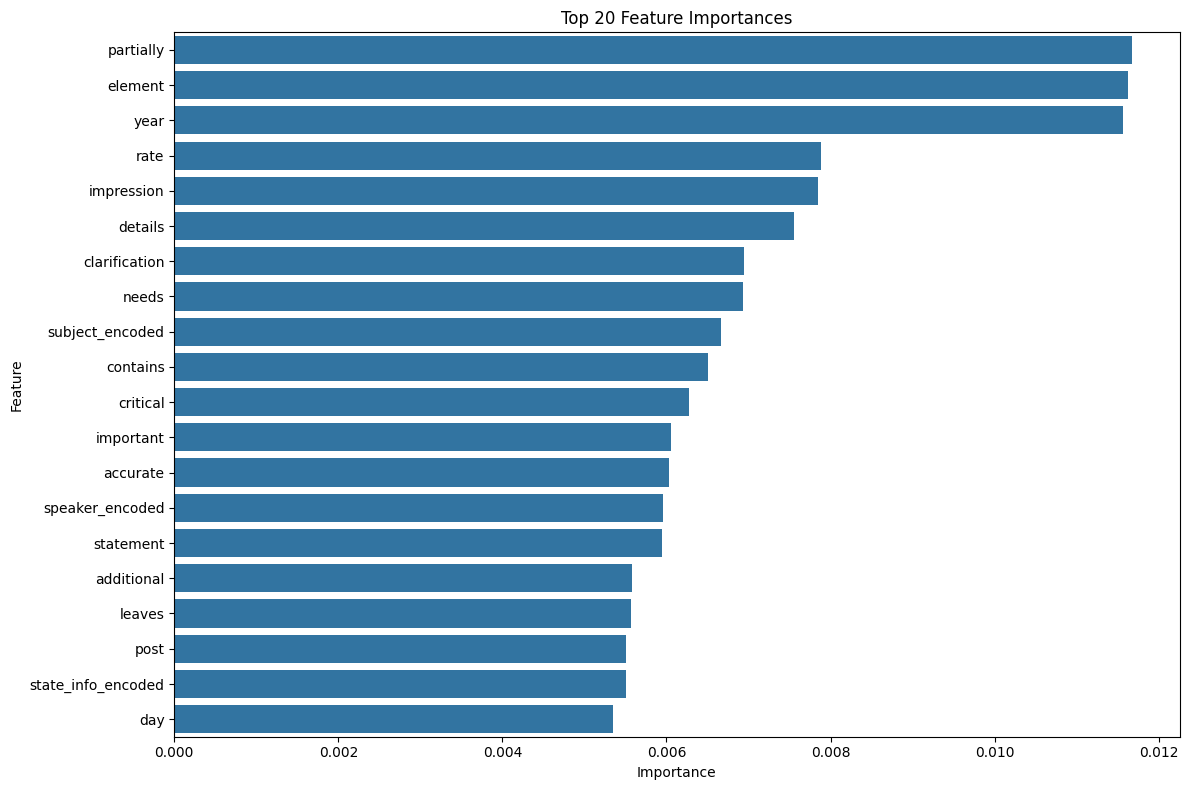

In [57]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Machine learning libraries
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier

# # For handling text data
# from sklearn.feature_extraction.text import TfidfVectorizer

# # For exporting and visualizing a tree from the forest
# from sklearn.tree import export_graphviz
# from subprocess import call
# from IPython.display import Image

# # Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

# # Load your datasets
# train_df = pd.read_csv('LIAR2/liar2/train.csv', encoding='utf-8', delimiter=',')
# val_df = pd.read_csv('LIAR2/liar2/valid.csv', encoding='utf-8', delimiter=',')
# test_df = pd.read_csv('LIAR2/liar2/test.csv', encoding='utf-8', delimiter=',')

# # Combine datasets
# data_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Select specified columns
columns_to_use = [
    'label',
    'statement',
    'date',
    'subject',
    'speaker',
    'speaker_description',
    'state_info',
    'context',
    'justification'
]

data_df = data_df[columns_to_use]

# Handle missing values by filling with 'Unknown'
data_df = data_df.fillna('Unknown')

# Encode target variable 'label'
label_encoder = LabelEncoder()
data_df['label_encoded'] = label_encoder.fit_transform(data_df['label'])

# Process date feature
# Convert 'date' to datetime
data_df['date'] = pd.to_datetime(data_df['date'], errors='coerce')
data_df['date'] = data_df['date'].fillna(pd.Timestamp('1900-01-01'))

# Extract date features
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

# Combine text features for vectorization
text_features = ['statement', 'speaker_description', 'context', 'justification']
data_df['text_combined'] = data_df[text_features].apply(lambda x: ' '.join(x), axis=1)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
text_tfidf = tfidf_vectorizer.fit_transform(data_df['text_combined'])

# Encode categorical features using Label Encoding
categorical_features = ['subject', 'speaker', 'state_info']

for col in categorical_features:
    data_df[col] = data_df[col].astype(str)
    data_df[col] = data_df[col].fillna('Unknown')
    lbl_enc = LabelEncoder()
    data_df[col + '_encoded'] = lbl_enc.fit_transform(data_df[col])

# Prepare feature matrix X and target vector y
feature_columns = ['year', 'month', 'day', 'subject_encoded', 'speaker_encoded', 'state_info_encoded']
X_numerical = data_df[feature_columns].values

# Combine numerical and text features
from scipy.sparse import hstack
X = hstack([X_numerical, text_tfidf])

# Target variable
y = data_df['label_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_classifier.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

# Convert class labels to strings to avoid TypeError
target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

# Extract feature importances
importances = rf_classifier.feature_importances_

# Get feature names
numerical_feature_names = feature_columns
text_feature_names = tfidf_vectorizer.get_feature_names_out()
all_feature_names = numerical_feature_names + list(text_feature_names)

# Create DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 20 features
print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))

# Visualize top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize a single decision tree from the Random Forest (optional)
# Ensure that Graphviz is installed on your system to execute the following code
try:
    # Extract a single tree
    estimator = rf_classifier.estimators_[0]

    # Export the tree to a dot file
    export_graphviz(estimator, out_file='tree.dot',
                    feature_names=all_feature_names,
                    class_names=target_names,
                    rounded=True, proportion=False,
                    precision=2, filled=True)

    # Convert to PNG using Graphviz
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display the tree image
    Image(filename='tree.png')
except Exception as e:
    print("An error occurred while visualizing the decision tree:", e)
    print("Ensure that Graphviz is installed and properly configured.")
